# Beam Expander Design

In [1]:
import numpy as np

from optiland import optic, optimization

Define a starting lens:

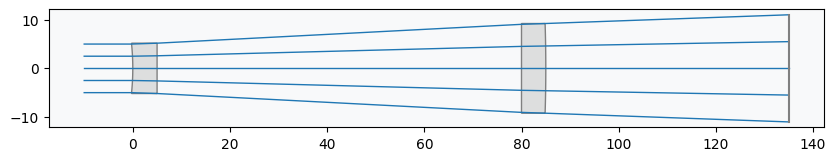

In [2]:
lens = optic.Optic()

# define beam expander properties
radius_start = 5
radius_end = 15

# add surfaces
lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(index=1, thickness=5, radius=-50, material="N-BK7", is_stop=True)
lens.add_surface(index=2, thickness=75, radius=np.inf)
lens.add_surface(index=3, thickness=5, radius=np.inf, material="N-BK7")
lens.add_surface(index=4, thickness=50, radius=-300)
lens.add_surface(index=5)

# set aperture
lens.set_aperture(aperture_type="EPD", value=2 * radius_start)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.633, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
# Ray y-intersect at last lens surface
input_data = {
    "optic": lens,
    "surface_number": 4,
    "Hx": 0,
    "Hy": 0,
    "Px": 0,
    "Py": 1,
    "wavelength": 0.633,
}
problem.add_operand(
    operand_type="real_y_intercept",
    target=radius_end,
    weight=1,
    input_data=input_data,
)

# Ray y-intersect at image surface
input_data = {
    "optic": lens,
    "surface_number": 5,
    "Hx": 0,
    "Hy": 0,
    "Px": 0,
    "Py": 1,
    "wavelength": 0.633,
}
problem.add_operand(
    operand_type="real_y_intercept",
    target=radius_end,
    weight=1,
    input_data=input_data,
)

Define variables - let two radii of curvature vary:

In [5]:
problem.add_variable(lens, "radius", surface_number=1)  # first surface of first lens
problem.add_variable(lens, "radius", surface_number=4)  # second surface of second lens

Check initial merit function value and system properties:

In [6]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                 49.144 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤══════════════════╤══════════╤══════════╤══════════╤══════════╤════════════════════╕
│    │ Operand Type     │   Target │   Weight │    Value │    Delta │   Contribution (%) │
╞════╪══════════════════╪══════════╪══════════╪══════════╪══════════╪════════════════════╡
│  0 │ real y intercept │       15 │        1 │  9.22613 │ -5.77387 │            67.8366 │
│  1 │ real y intercept │       15 │        1 │ 11.0243  │ -3.97572 │            32.1634 │
╘════╧══════════════════╧══════════╧══════════╧══════════╧══════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   Value │ Min. Bound   │ Max. Bound   │
╞════╪═════════════════╪═══════════╪════

Define optimizer:

In [7]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [8]:
optimizer.optimize(tol=1e-6)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 2.2236952958197887e-12
        x: [-1.214e+00 -1.641e+00]
      nit: 19
      jac: [-1.639e-04  2.945e-05]
     nfev: 111
     njev: 37
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [9]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │            2.51819e-12 │               100 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤══════════════════╤══════════╤══════════╤═════════╤══════════════╤════════════════════╕
│    │ Operand Type     │   Target │   Weight │   Value │        Delta │   Contribution (%) │
╞════╪══════════════════╪══════════╪══════════╪═════════╪══════════════╪════════════════════╡
│  0 │ real y intercept │       15 │        1 │      15 │ -7.01452e-07 │            19.5393 │
│  1 │ real y intercept │       15 │        1 │      15 │ -1.42343e-06 │            80.4607 │
╘════╧══════════════════╧══════════╧══════════╧═════════╧══════════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤══════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │    Value │ Min. Bound   │ Max. Bound   │
╞════╪══════════════

Draw final lens:

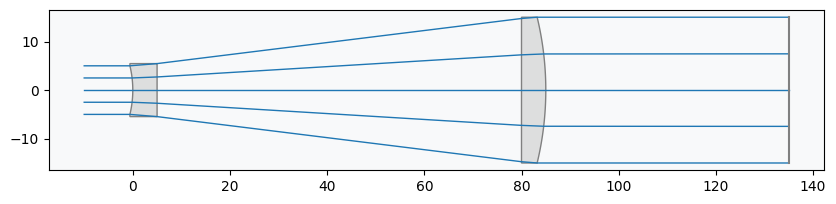

In [10]:
lens.draw(num_rays=5)